#HW1 - Data Exploration and Preparation

## Part 1: Data Loadin and First Look

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### Loading the dataset

In [ ]:
!rm *.csv

from google.colab import files
print("Please load the raw csv data")
uploadedData = files.upload()
filename = list(uploadedData)[0]

rm: cannot remove '*.csv': No such file or directory
Please load the raw csv data


Saving virus_data.csv to virus_data.csv


In [ ]:
dataset = pd.read_csv(filename)

In [ ]:
# Q1 getting the datas #rows and #cols
dataset.shape

(1250, 25)

In [ ]:
# Q2 inspecting conversations_per_day field
dataset.conversations_per_day.value_counts()

conversations_per_day
3     218
2     204
5     179
4     168
1     108
6     107
7      94
8      54
9      42
10     29
11     16
13      8
12      7
14      6
16      5
15      3
17      1
29      1
Name: count, dtype: int64

In [ ]:
# Q3 inspecting the features of the data
print(dataset.columns)
print(dataset.PCR_10.value_counts())
dataset.head()

Index(['patient_id', 'age', 'sex', 'weight', 'blood_type', 'current_location',
       'num_of_siblings', 'happiness_score', 'household_income',
       'conversations_per_day', 'sugar_levels', 'sport_activity', 'pcr_date',
       'PCR_01', 'PCR_02', 'PCR_03', 'PCR_04', 'PCR_05', 'PCR_06', 'PCR_07',
       'PCR_08', 'PCR_09', 'PCR_10', 'spread', 'risk'],
      dtype='object')
PCR_10
-126.780598    1
-154.771775    1
 17.042635     1
-183.836107    1
-71.704747     1
              ..
-112.111519    1
 183.994231    1
 170.907313    1
-118.483405    1
-53.083826     1
Name: count, Length: 1250, dtype: int64


patient_id  age sex  weight blood_type          current_location  \
0         733   31   F    80.8         O-  ('11.93381', '79.82979')   
1         382   29   F    63.0         O+   ('51.67822', '33.9162')   
2        1164   44   F    74.2         O+  ('60.02427', '30.28491')   
3         897    9   M    31.8         O-   ('51.08468', '7.11393')   
4        1187   18   F    42.4         A-  ('38.45598', '48.87498')   

   num_of_siblings  happiness_score  household_income  conversations_per_day  \
0                6                6               0.7                      5   
1                1                9               NaN                     11   
2                2               10               1.5                      3   
3                3                9               0.5                      8   
4                0                8               0.2                      4   

   ...      PCR_03      PCR_04    PCR_05     PCR_06    PCR_07     PCR_08  \
0  ... -154.375498  176.847024  4.385181  10.213329  0.927466  22.333871   
1  ... -200.700948   -7.135415  7.128887  30.027329 -0.084755   1.700489   
2  ...  127.222441   59.712513  1.227654  16.907687  1.609130   7.258721   
3  ...  116.178667   72.100204  6.181840  17.018475  2.313162   1.707770   
4  ...   71.377753  187.436001  4.709932  13.888960  5.401181   4.500906   

     PCR_09      PCR_10  spread  risk  
0  2.392578 -126.780598     1.0     1  
1  2.735347 -175.576828    -1.0    -1  
2  4.937827 -233.105192    -1.0    -1  
3  1.686465  -28.548362    -1.0    -1  
4  3.767817  -27.173870    -1.0    -1  

[5 rows x 25 columns]

In [ ]:
# Q4 partitioning the data to train and test sets
train_set, test_set = train_test_split(dataset, test_size=0.2, random_state=8)
unchanged_train_set = train_set.copy() # this will be used in part 6
unchanged_test_set = test_set.copy() # this will be used in part 6

## Part 2: Missing Values

In [ ]:
# Q5 looking for null values in the data
print("training set null values: \n", pd.isnull(train_set).sum(),"\n")
print("test set null values: \n",pd.isnull(test_set).sum(), "\n")

training set null values: 
 patient_id                0
age                       0
sex                       0
weight                    0
blood_type                0
current_location          0
num_of_siblings           0
happiness_score           0
household_income         86
conversations_per_day     0
sugar_levels              0
sport_activity            0
pcr_date                  0
PCR_01                    0
PCR_02                    0
PCR_03                    0
PCR_04                    0
PCR_05                    0
PCR_06                    0
PCR_07                    0
PCR_08                    0
PCR_09                    0
PCR_10                    0
spread                    0
risk                      0
dtype: int64 

test set null values: 
 patient_id                0
age                       0
sex                       0
weight                    0
blood_type                0
current_location          0
num_of_siblings           0
happiness_score           0
household

Text(0.5, 1.0, 'Histogram of household income')

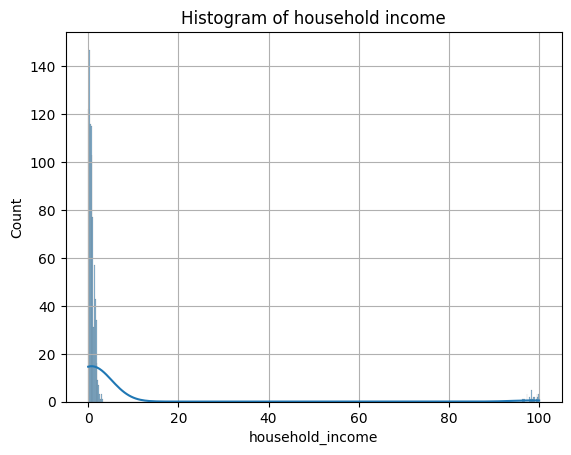

In [ ]:
# Q6 checking the distribution of income values
sns.histplot(train_set.household_income, kde=True)
plt.grid()
plt.title(r'Histogram of household income')

In [ ]:
# Q7 inspecting household_income statistics for replacing null values
print("mean is: ", train_set.household_income.mean())
print("median is: ", train_set.household_income.median())

mean is:  3.8589715536105036
median is:  0.7


In [ ]:
# Q7 - Task A - filling null values with median values
filled_train_set = train_set.fillna({"household_income":train_set.household_income.median()})
filled_test_set = test_set.fillna({"household_income":test_set.household_income.median()})
print("mean is: ", filled_train_set.household_income.mean())
print("median is: ", filled_train_set.household_income.median())

mean is:  3.5873000000000004
median is:  0.7


## **Part 3: Warming up with k-Nearest Neighbors**

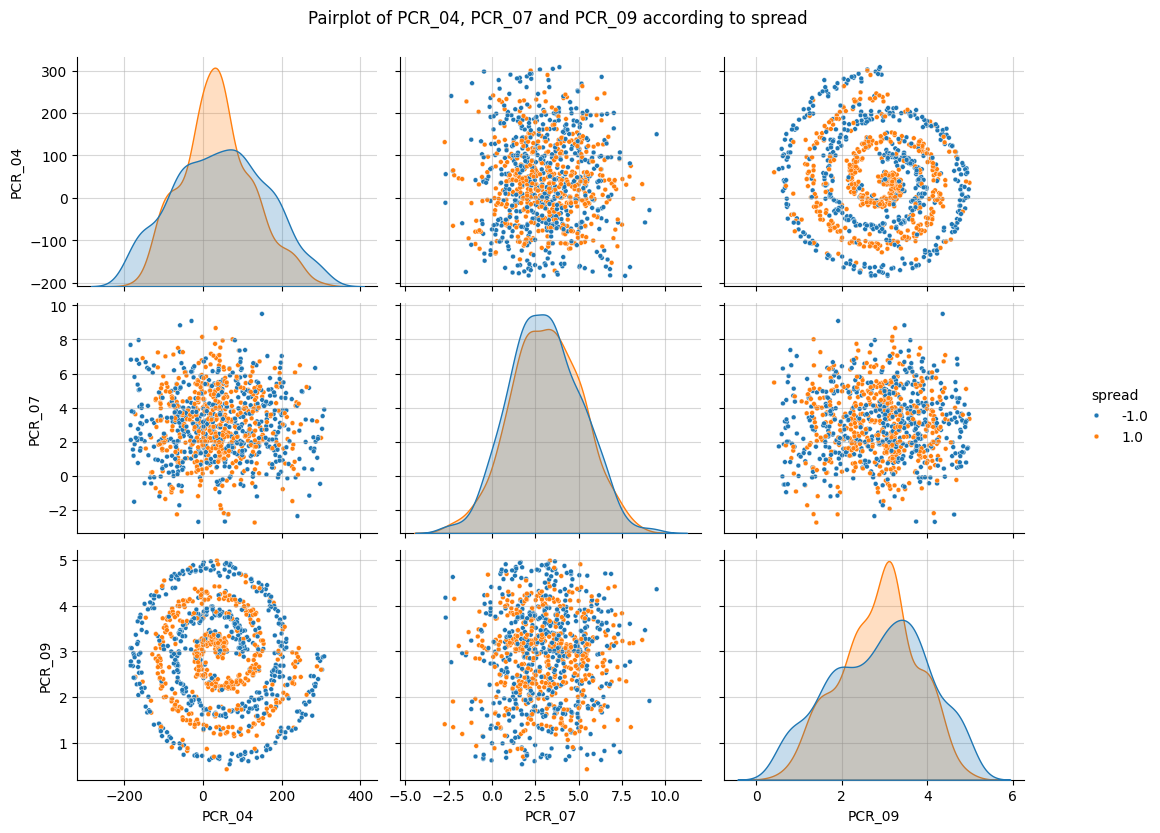

In [ ]:
# Task B
g=sns.pairplot(train_set, hue="spread", palette="tab10" , vars=["PCR_04", "PCR_07", "PCR_09"], plot_kws={"s":12})
g.fig.suptitle("Pairplot of PCR_04, PCR_07 and PCR_09 according to spread", y=1.04)
for ax in np.ravel(g.axes):
  ax.grid(alpha=0.5)
g.fig.set_size_inches(12,8)

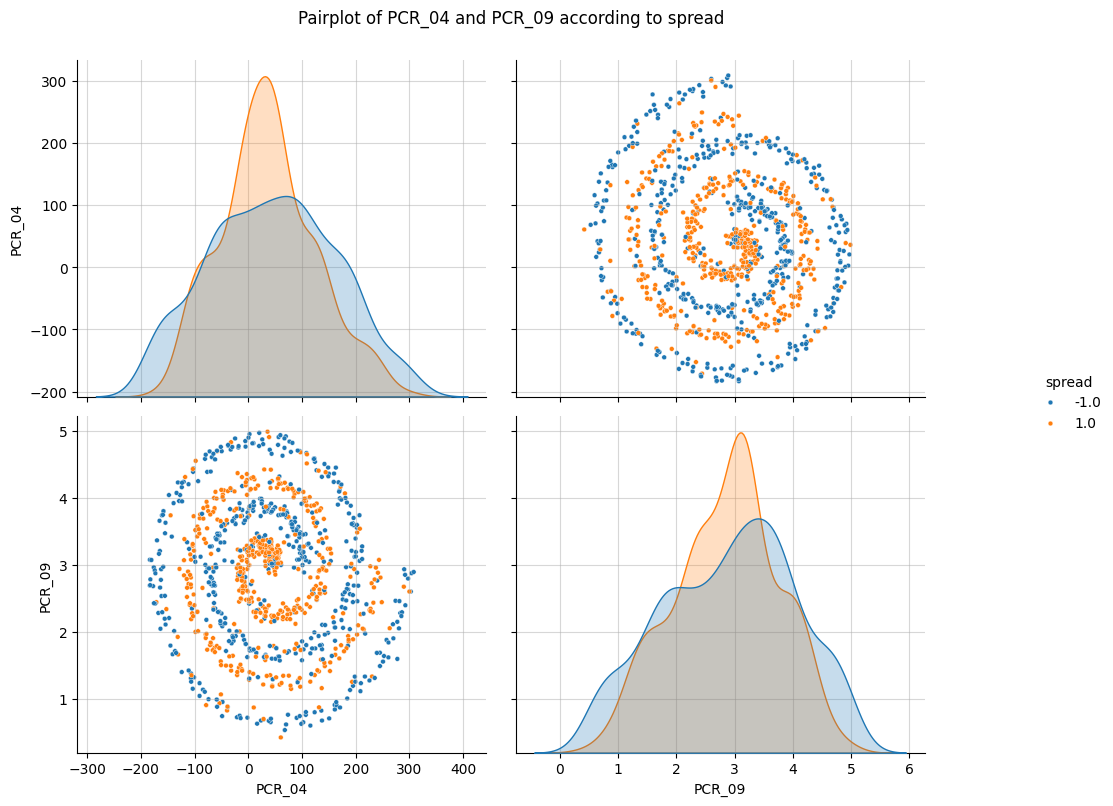

In [ ]:
# Q8
g=sns.pairplot(train_set, hue="spread", palette="tab10" , vars=["PCR_04", "PCR_09"], plot_kws={"s":12})
g.fig.suptitle("Pairplot of PCR_04 and PCR_09 according to spread", y=1.04)
for ax in np.ravel(g.axes):
  ax.grid(alpha=0.5)
g.fig.set_size_inches(12,8)

In [ ]:
def visualize_clf(clf, X, Y, title,
                  xlabel, ylabel,
                  marker_size=50,
                  grid_length=300,
                  linewidths=None):
    import matplotlib.pyplot as plt
    import pandas as pd
    from matplotlib.colors import ListedColormap

    if isinstance(X, pd.DataFrame):
        X = X.to_numpy()

    # For internal use here, make sure labels are 0 and 1
    Y = np.ravel(Y).astype(int)
    labels = set(Y)
    assert len(labels) == 2, "Can only visualize two unique labels"

    if labels == set([-1,1]):
      Y = (Y + 1) // 2
      labels = set(Y)

    assert labels == set([0,1]), "Could not handle given labels"

    plt.figure(figsize=(8, 8))

    # Parameters
    n_classes = 2
    markers = ["D", "o"]
    palette = sns.color_palette("hls", 2)
    custom_cmap = ListedColormap(palette.as_hex())

    x_delta = np.abs(X[:, 0].max() - X[:, 0].min()) * 0.1
    y_delta = np.abs(X[:, 1].max() - X[:, 1].min()) * 0.1
    x_min, x_max = X[:, 0].min() - x_delta, X[:, 0].max() + x_delta
    y_min, y_max = X[:, 1].min() - y_delta, X[:, 1].max() + y_delta
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, grid_length),
                         np.linspace(y_min, y_max, grid_length))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cs = plt.contourf(xx, yy, Z, cmap=custom_cmap, alpha=0.35)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.75)

    # Plot the training points
    for i, color, marker in zip(labels, palette, markers):
        idx = np.where(Y == i)
        plt.scatter(X[idx, 0], X[idx, 1], color=color,
                    marker=marker,
                    edgecolor='white', s=marker_size,
                    linewidths=linewidths)

    plt.title(title, fontsize=20)
    plt.axis("tight")
    plt.show()


In [ ]:
# Task C: k-NN implementation
from sklearn.base import BaseEstimator, ClassifierMixin
import scipy as sp

class kNN(BaseEstimator, ClassifierMixin):
  def __init__(self, n_neighbors: int = 3):
    self.n_neighbors = n_neighbors

  def fit(self, X, y):
    self.X_train = X
    self.Y_train = y
    return self

  def predict(self, X):
    distances = sp.spatial.distance.cdist(X, self.X_train)
    partition_ind = np.argpartition(distances, self.n_neighbors)
    neighbor_ind = np.delete(partition_ind, np.s_[self.n_neighbors:], axis=1)
    predictions = np.sum(np.array(self.Y_train)[neighbor_ind], axis=1)
    predictions[predictions < 0] = -1
    predictions[predictions >= 0] = 1
    return predictions

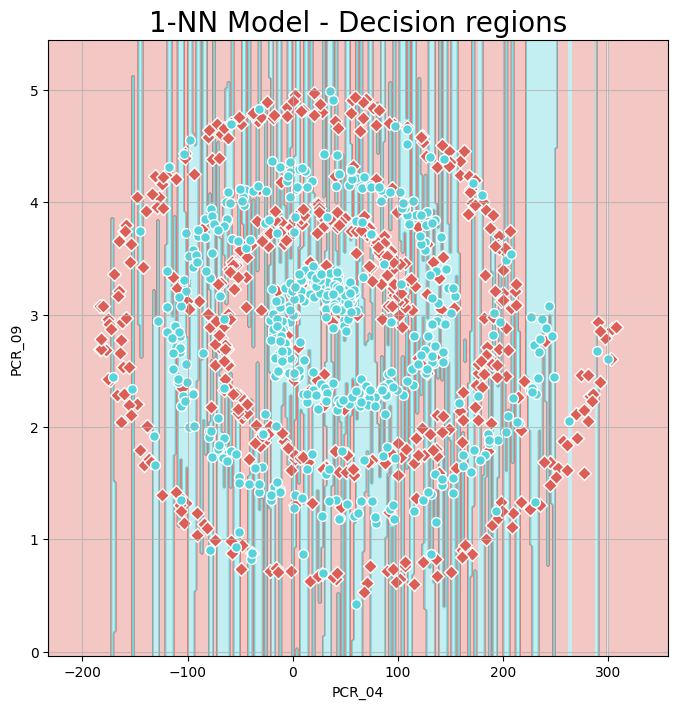

Trainig accurecy:  1.000
Test accurecy:  0.600


In [ ]:
# Task D
tmp = train_set[["PCR_04", "PCR_09", "spread"]]
clf = kNN(1)
X = tmp[["PCR_04", "PCR_09"]].values
y = tmp.spread.values
clf.fit(X,y)
visualize_clf(clf, X, y, "1-NN Model - Decision regions", "PCR_04", "PCR_09")

tmp_test = test_set[["PCR_04", "PCR_09", "spread"]]
X_test = tmp_test[["PCR_04", "PCR_09"]].values
y_test = tmp_test.spread.values

print(f"Trainig accurecy: {clf.score(X, y): .3f}", )
print(f"Test accurecy: {clf.score(X_test, y_test): .3f}")

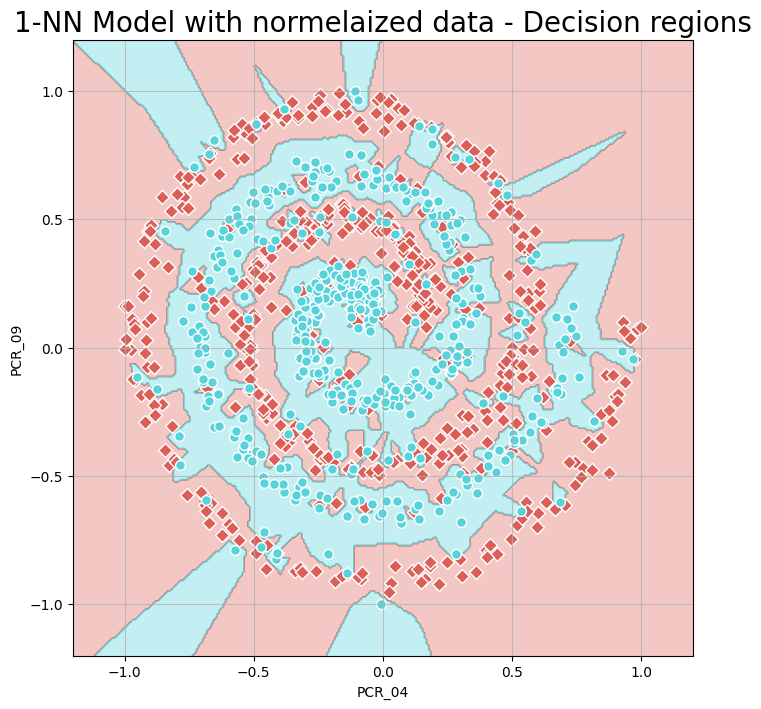

Trainig accurecy: 1.0
Test accurecy: 0.696


In [ ]:
# Q11 - Nornalization using min-max scailing
from sklearn.preprocessing import MinMaxScaler
# y (spread) is alredy normelized to min max so no need to norm again,
y_normed = tmp.spread.values
scaler = MinMaxScaler((-1, 1))
X = tmp[["PCR_04", "PCR_09"]].values
X_normed = scaler.fit_transform(X)

clf.fit(X_normed,y_normed)
visualize_clf(clf, X_normed, y_normed, "1-NN Model with normelaized data - Decision regions", "PCR_04", "PCR_09")

tmp_test = test_set[["PCR_04", "PCR_09", "spread"]]
y_test_normed = tmp_test.spread.values

X_test = tmp_test[["PCR_04", "PCR_09"]].values
X_test_normed = scaler.fit_transform(X_test)

print(f"Trainig accurecy: {clf.score(X_normed,y_normed)}")
print(f"Test accurecy: {clf.score(X_test_normed, y_test_normed)}")

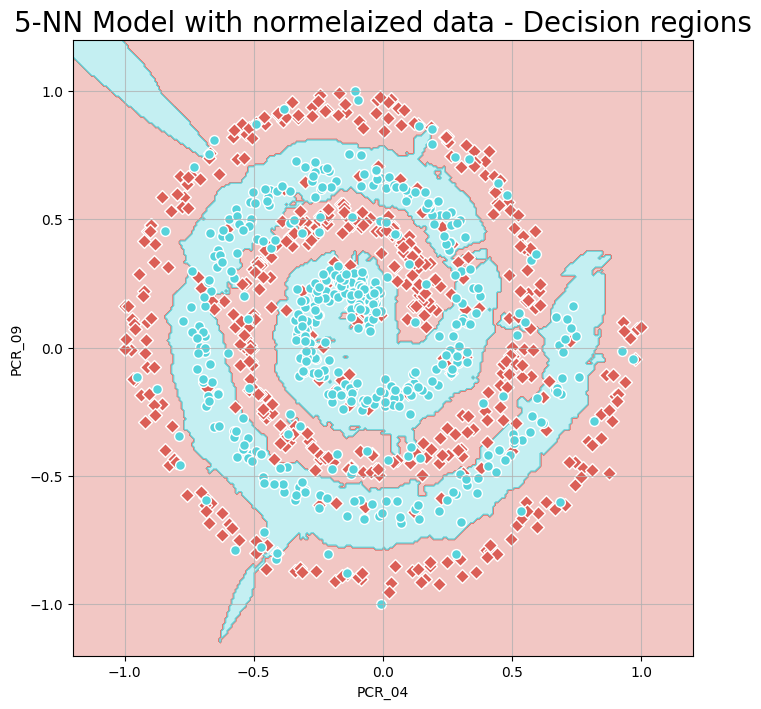

Trainig accurecy: 0.853
Test accurecy: 0.8


In [ ]:
# Q12
clf = kNN(5)
clf.fit(X_normed,y_normed)
visualize_clf(clf, X_normed, y_normed, "5-NN Model with normelaized data - Decision regions", "PCR_04", "PCR_09")


y_test_normed = tmp_test.spread.values

X_test_normed = scaler.fit_transform(X_test)

print(f"Trainig accurecy: {clf.score(X_normed,y_normed)}")
print(f"Test accurecy: {clf.score(X_test_normed, y_test_normed)}")

## **Part 4: Data exploration**

In [ ]:
# Task E
train_set['SpecialProperty']= train_set['blood_type'].isin(["O+", "B+"])
train_set.head()

patient_id  age sex  weight blood_type            current_location  \
1116        1192   33   F    79.2         A+    ('57.30185', '39.85331')   
431          298   40   F    66.2         A-     ('51.19139', '6.51352')   
787           42   13   M    30.1         B+    ('60.02427', '30.28491')   
687         1237   10   F    34.9         A+  ('-21.41222', '-42.19667')   
1170         320   11   M    34.0         A+   ('16.75973', '-93.11308')   

      num_of_siblings  happiness_score  household_income  \
1116                0                7               0.1   
431                 3               10               1.4   
787                 2               11               1.1   
687                 2                8               1.2   
1170                3               10               0.1   

      conversations_per_day  ...      PCR_04    PCR_05     PCR_06    PCR_07  \
1116                      3  ...  -47.968221  9.932137  12.790870  6.312972   
431                       3  ...  229.658624  7.629410   7.481239  1.839662   
787                       4  ...   29.158228  2.951464   8.904931  5.418653   
687                       9  ...   38.010358  3.420755  12.785897  4.270684   
1170                      3  ...  190.228764  6.141771  14.821847  5.215344   

         PCR_08    PCR_09      PCR_10  spread  risk  SpecialProperty  
1116   4.622748  3.584332  198.797581    -1.0     1            False  
431    0.964449  2.724775 -118.979191     1.0     1            False  
787    0.328412  3.855359  214.041681    -1.0    -1             True  
687   13.076815  3.874539    6.711324    -1.0    -1            False  
1170   1.555425  2.821934 -155.832156     1.0    -1            False  

[5 rows x 26 columns]

In [ ]:
train_set.drop("blood_type", inplace=True, axis=1)
train_set.head()

patient_id  age sex  weight            current_location  \
1116        1192   33   F    79.2    ('57.30185', '39.85331')   
431          298   40   F    66.2     ('51.19139', '6.51352')   
787           42   13   M    30.1    ('60.02427', '30.28491')   
687         1237   10   F    34.9  ('-21.41222', '-42.19667')   
1170         320   11   M    34.0   ('16.75973', '-93.11308')   

      num_of_siblings  happiness_score  household_income  \
1116                0                7               0.1   
431                 3               10               1.4   
787                 2               11               1.1   
687                 2                8               1.2   
1170                3               10               0.1   

      conversations_per_day  sugar_levels  ...      PCR_04    PCR_05  \
1116                      3           112  ...  -47.968221  9.932137   
431                       3           104  ...  229.658624  7.629410   
787                       4            51  ...   29.158228  2.951464   
687                       9            52  ...   38.010358  3.420755   
1170                      3            55  ...  190.228764  6.141771   

         PCR_06    PCR_07     PCR_08    PCR_09      PCR_10  spread  risk  \
1116  12.790870  6.312972   4.622748  3.584332  198.797581    -1.0     1   
431    7.481239  1.839662   0.964449  2.724775 -118.979191     1.0     1   
787    8.904931  5.418653   0.328412  3.855359  214.041681    -1.0    -1   
687   12.785897  4.270684  13.076815  3.874539    6.711324    -1.0    -1   
1170  14.821847  5.215344   1.555425  2.821934 -155.832156     1.0    -1   

      SpecialProperty  
1116            False  
431             False  
787              True  
687             False  
1170            False  

[5 rows x 25 columns]

In [ ]:
test_set['SpecialProperty']= test_set['blood_type'].isin(["O+", "B+"])
test_set.drop("blood_type", inplace=True, axis=1)
test_set.head()

patient_id  age sex  weight            current_location  num_of_siblings  \
175        1222   28   F    61.3    ('43.35071', '46.10925')                2   
718         623   23   F    47.5         ('36', '139.55722')                1   
842         741   27   M    72.7     ('45.79377', '8.88104')                2   
719         914   20   F    57.7  ('-30.60106', '-71.19901')                1   
81          394   46   M    59.3      ('43.32393', '5.4584')                0   

     happiness_score  household_income  conversations_per_day  sugar_levels  \
175               10               1.8                      4            84   
718                9               1.3                      3            85   
842                6               1.3                      1            78   
719               11               0.4                      5            86   
81                 8               0.9                      5            97   

     ...      PCR_04    PCR_05     PCR_06    PCR_07    PCR_08    PCR_09  \
175  ...  166.082871  3.468877  14.945469  3.900002  1.650602  4.217940   
718  ...  -42.662630  3.615593  21.283404  4.281109  2.009198  4.034490   
842  ...  -95.478766  9.221566   7.868320  3.412289  1.088141  1.935927   
719  ...    0.077486  7.632352  10.150115  3.849596  1.831952  2.476205   
81   ...  -44.860428  6.753043  29.025270  2.815165  5.123042  1.446021   

         PCR_10  spread  risk  SpecialProperty  
175 -148.676942    -1.0    -1            False  
718  208.036927     1.0    -1            False  
842  -88.545652     1.0    -1            False  
719  179.373873     1.0     1            False  
81  -111.663023    -1.0     1            False  

[5 rows x 25 columns]

In [ ]:
train_set.columns

Index(['patient_id', 'age', 'sex', 'weight', 'current_location',
       'num_of_siblings', 'happiness_score', 'household_income',
       'conversations_per_day', 'sugar_levels', 'sport_activity', 'pcr_date',
       'PCR_01', 'PCR_02', 'PCR_03', 'PCR_04', 'PCR_05', 'PCR_06', 'PCR_07',
       'PCR_08', 'PCR_09', 'PCR_10', 'spread', 'risk', 'SpecialProperty'],
      dtype='object')

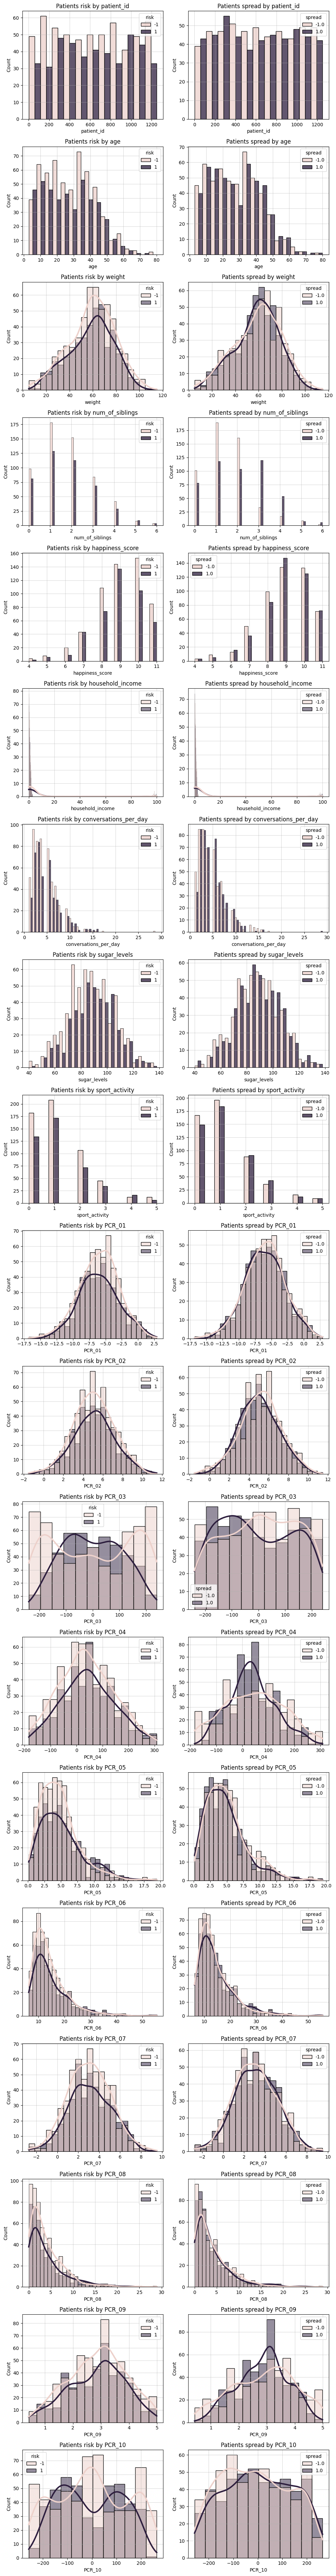

In [ ]:
NON_NUMERIC_VALUE_COLS = ["sex", "current_location", "pcr_date", "SpecialProperty"]
COL_NAME = [col for col in train_set.columns if col not in ["spread", "risk"] and col not in NON_NUMERIC_VALUE_COLS]
COLS, ROWS = (2, len(COL_NAME))
plt.figure(figsize=(5 * COLS, 4 * ROWS))

for row in range(ROWS):
  column = COL_NAME[row]

  for j, cls in enumerate(["risk", "spread"]):
    plt.subplot(ROWS,COLS, row * COLS + 1 + j)

    isContinuous = "float" in train_set[column].dtype.name
    sns.histplot(data=train_set, x=column, hue=cls, line_kws={"linewidth": 3}, kde=isContinuous, multiple="layer" if isContinuous else "dodge")
    plt.grid(alpha=0.5)
    plt.title(f"Patients {cls} by {column}")

  plt.tight_layout()

Q16

In [ ]:
special_prop_data =  train_set[train_set.SpecialProperty == True]
special_prop_data

patient_id  age sex  weight            current_location  \
787           42   13   M    30.1    ('60.02427', '30.28491')   
958          485   25   F    62.5      ('2.2139', '102.3278')   
1080         930   34   M    92.6  ('32.42067', '-104.22884')   
855         1013    7   M    49.2     ('50.80019', '7.20769')   
1202         520   33   F    67.5         ('43.11667', '1.6')   
...          ...  ...  ..     ...                         ...   
458          189   40   F    72.0    ('21.59983', '71.21169')   
136         1022   24   M    80.5  ('37.71715', '-122.40433')   
133          989   21   F    43.7         ('36', '139.55722')   
361         1233   14   M    47.3   ('34.77453', '-96.67834')   
451          354   27   F    60.8   ('36.75965', '137.36215')   

      num_of_siblings  happiness_score  household_income  \
787                 2               11               1.1   
958                 0               11               0.5   
1080                0               10               0.0   
855                 3                9               0.9   
1202                1               10               NaN   
...               ...              ...               ...   
458                 1                8               1.4   
136                 2                8              98.3   
133                 5                9               1.4   
361                 2                9              98.5   
451                 0                9              97.3   

      conversations_per_day  sugar_levels  ...      PCR_04     PCR_05  \
787                       4            51  ...   29.158228   2.951464   
958                       3            90  ...  182.142026   5.060117   
1080                      6           100  ...  102.609249   6.856732   
855                       3           104  ...   93.131807   4.838128   
1202                      5            66  ...  -48.760895  10.146727   
...                     ...           ...  ...         ...        ...   
458                       6            97  ...  -18.068014   7.501986   
136                       4           111  ... -123.388106   5.454194   
133                       2           107  ...  -70.070644   5.460181   
361                       2           100  ...  -33.347116   2.821522   
451                       5            93  ...   66.491514   2.878327   

         PCR_06    PCR_07     PCR_08    PCR_09      PCR_10  spread  risk  \
787    8.904931  5.418653   0.328412  3.855359  214.041681    -1.0    -1   
958   13.734103  2.582293   0.119180  2.965001 -150.161256    -1.0    -1   
1080   8.983756  3.595356   6.546670  4.088975 -139.881650     1.0    -1   
855   31.918471  3.953366   1.907258  2.936098   15.398638     1.0    -1   
1202  21.938312  5.497337   8.594889  0.738525 -145.509688    -1.0     1   
...         ...       ...        ...       ...         ...     ...   ...   
458   13.560578  1.161278  13.039408  4.774075 -152.079072    -1.0     1   
136    8.199846 -0.080330   7.618155  3.948342  147.403699    -1.0    -1   
133   25.072925  1.004998   0.095731  2.818201  125.005638    -1.0     1   
361   10.703159  3.307109   0.211653  4.144367   44.878989     1.0     1   
451    7.820073  1.466162   2.974138  3.335414  127.694965     1.0     1   

      SpecialProperty  
787              True  
958              True  
1080             True  
855              True  
1202             True  
...               ...  
458              True  
136              True  
133              True  
361              True  
451              True  

[476 rows x 25 columns]

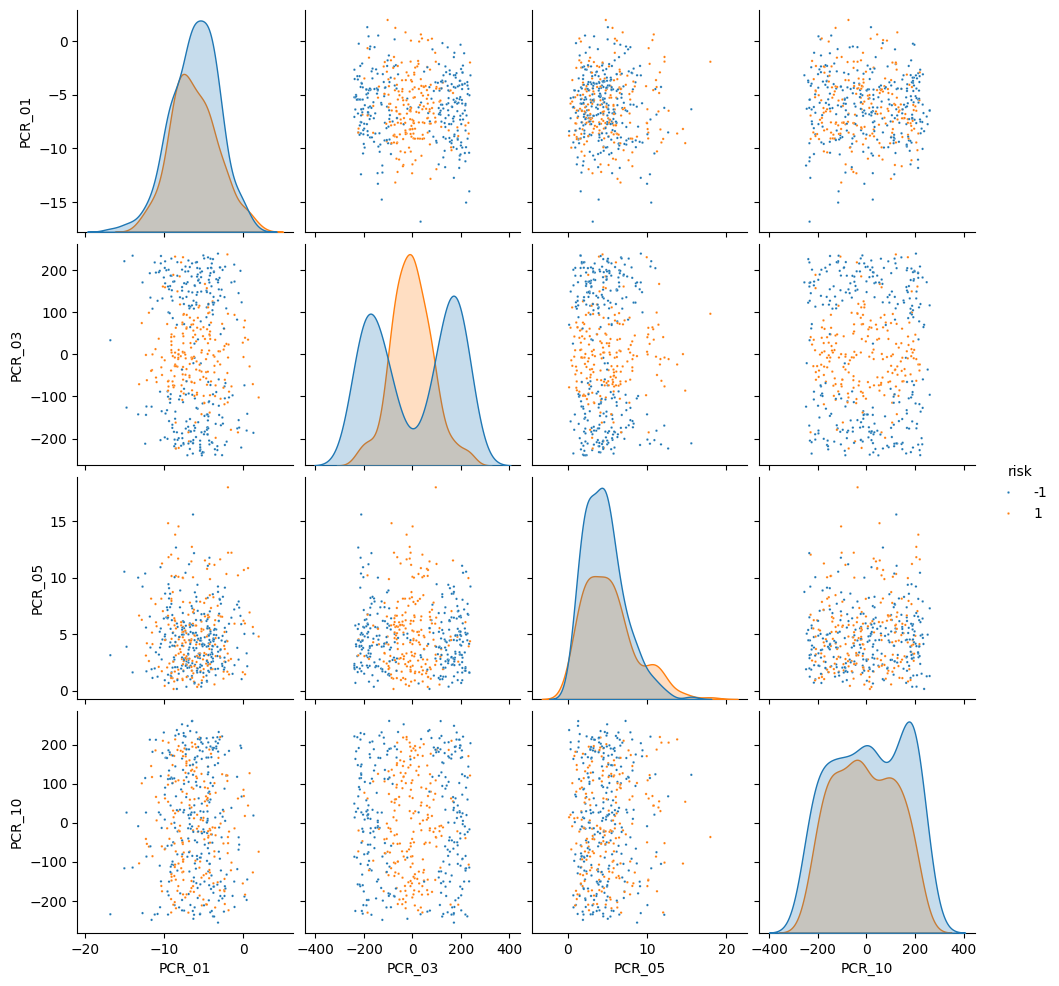

In [ ]:
sns.pairplot(special_prop_data[["PCR_01"]+["PCR_03"]+ ["PCR_05"]+["PCR_10"]+["risk"]], plot_kws={"s": 3}, hue="risk", palette="tab10")

In [ ]:
non_special_prop_data =  train_set[train_set.SpecialProperty == False]
non_special_prop_data

patient_id  age sex  weight            current_location  \
1116        1192   33   F    79.2    ('57.30185', '39.85331')   
431          298   40   F    66.2     ('51.19139', '6.51352')   
687         1237   10   F    34.9  ('-21.41222', '-42.19667')   
1170         320   11   M    34.0   ('16.75973', '-93.11308')   
590          299    8   F    33.8    ('17.30858', '97.01124')   
...          ...  ...  ..     ...                         ...   
828          557   35   F    70.6  ('-25.54073', '152.70493')   
1109         233   12   F    51.1      ('54.52156', '9.5586')   
48          1162    6   M    25.7   ('41.57721', '-93.71133')   
851         1071   56   F    52.2   ('51.82721', '107.60627')   
986          959   72   M    56.7  ('-21.44345', '-65.71875')   

      num_of_siblings  happiness_score  household_income  \
1116                0                7               0.1   
431                 3               10               1.4   
687                 2                8               1.2   
1170                3               10               0.1   
590                 2               10               1.0   
...               ...              ...               ...   
828                 0               10              97.4   
1109                0                9               0.4   
48                  5                5               0.7   
851                 0               10               1.5   
986                 2                9               1.2   

      conversations_per_day  sugar_levels  ...      PCR_04    PCR_05  \
1116                      3           112  ...  -47.968221  9.932137   
431                       3           104  ...  229.658624  7.629410   
687                       9            52  ...   38.010358  3.420755   
1170                      3            55  ...  190.228764  6.141771   
590                      10            60  ...  302.620502  6.213887   
...                     ...           ...  ...         ...       ...   
828                       9            83  ...  -41.523150  3.022902   
1109                      1            68  ...  -20.442303  5.131065   
48                        2            51  ... -113.951014  4.230884   
851                       9           105  ...    1.803058  3.135803   
986                       8            84  ...   27.287628  3.311949   

         PCR_06    PCR_07     PCR_08    PCR_09      PCR_10  spread  risk  \
1116  12.790870  6.312972   4.622748  3.584332  198.797581    -1.0     1   
431    7.481239  1.839662   0.964449  2.724775 -118.979191     1.0     1   
687   12.785897  4.270684  13.076815  3.874539    6.711324    -1.0    -1   
1170  14.821847  5.215344   1.555425  2.821934 -155.832156     1.0    -1   
590   11.736177  2.764665   1.284900  2.600576  192.726881    -1.0     1   
...         ...       ...        ...       ...         ...     ...   ...   
828   13.728434  2.893731   4.631455  1.711890   45.223169    -1.0    -1   
1109  14.343461  2.859342   0.920054  1.397596   57.126364     1.0     1   
48    12.851871  7.238084  11.570230  2.657323 -112.409752     1.0     1   
851    8.707598  2.895735   0.899622  1.300532   19.010269    -1.0    -1   
986   14.320924  2.883975  18.794242  3.363960  122.453361     1.0     1   

      SpecialProperty  
1116            False  
431             False  
687             False  
1170            False  
590             False  
...               ...  
828             False  
1109            False  
48              False  
851             False  
986             False  

[524 rows x 25 columns]

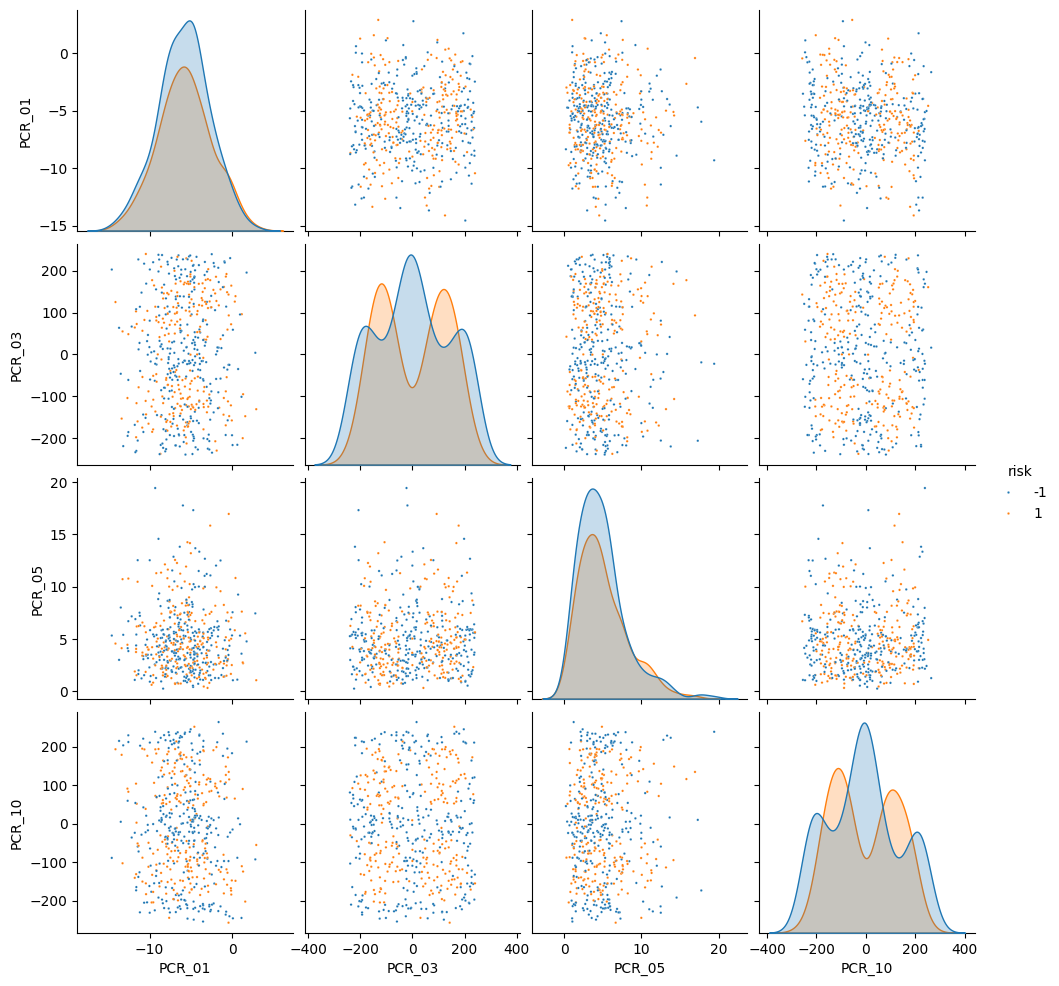

In [ ]:
sns.pairplot(non_special_prop_data[["PCR_01"]+["PCR_03"]+ ["PCR_05"]+["PCR_10"]+["risk"]], plot_kws={"s": 3}, hue="risk", palette="tab10")

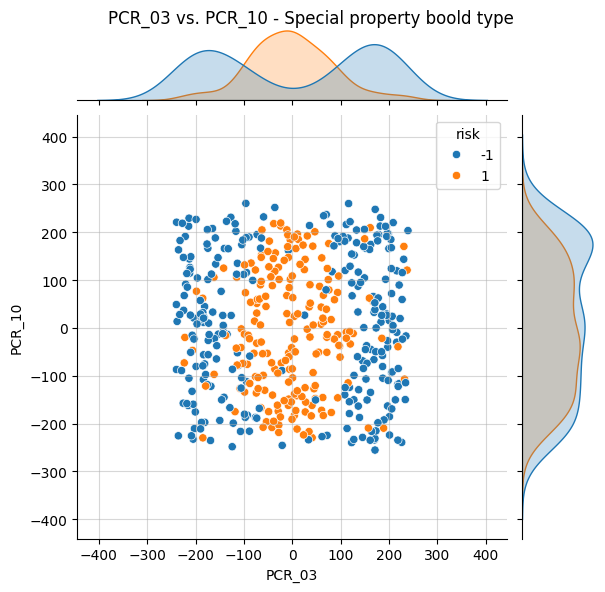

In [ ]:
# Q17
g = sns.jointplot(data=special_prop_data, x="PCR_03", y="PCR_10", hue="risk", palette="tab10")
g.fig.suptitle("PCR_03 vs. PCR_10 - Special property boold type")
g.fig.subplots_adjust(top=0.95)
g.ax_joint.grid(alpha=0.5)

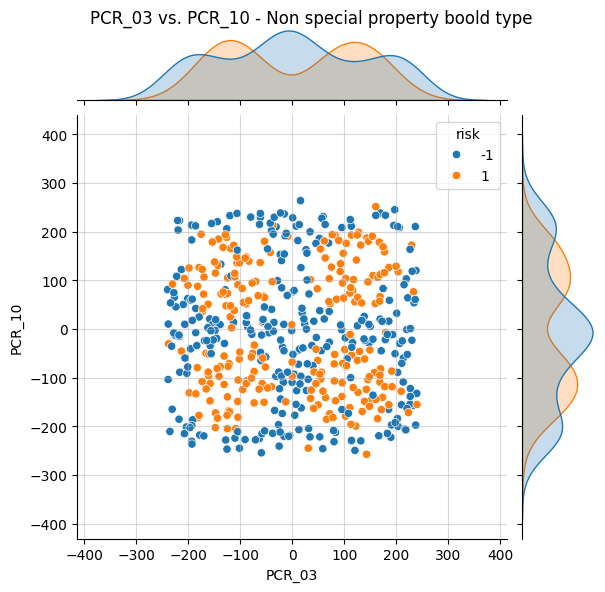

In [ ]:
g = sns.jointplot(data=non_special_prop_data, x="PCR_03", y="PCR_10", hue="risk", palette="tab10")
g.fig.suptitle("PCR_03 vs. PCR_10 - Non special property boold type")
g.fig.subplots_adjust(top=0.95)
g.ax_joint.grid(alpha=0.5)

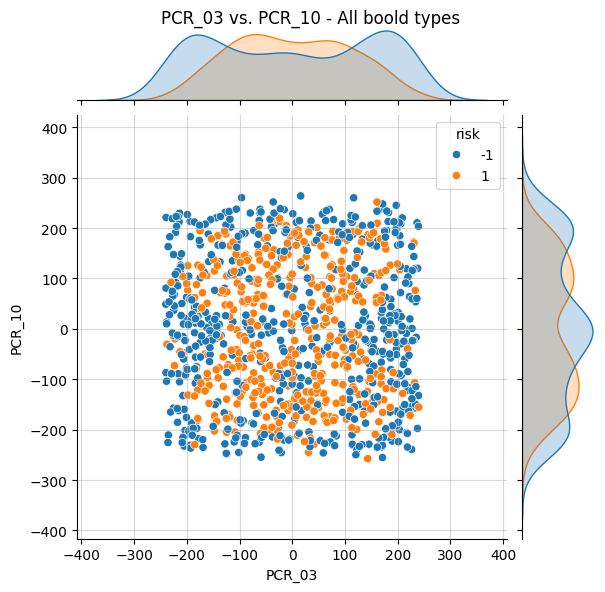

In [ ]:
g = sns.jointplot(data=train_set, x="PCR_03", y="PCR_10", hue="risk", palette="tab10")
g.fig.suptitle("PCR_03 vs. PCR_10 - All boold types")
g.fig.subplots_adjust(top=0.95)
g.ax_joint.grid(alpha=0.5)

In [ ]:
def plot3d(df, colX, colY, colZ, title, hue=None, s=1):
  %matplotlib inline

  fig = plt.figure(figsize=(20, 4))
  axes = [fig.add_subplot(1, 4, 1, projection='3d'),
          fig.add_subplot(1, 4, 2, projection='3d'),
          fig.add_subplot(1, 4, 3, projection='3d'),
          fig.add_subplot(1, 4, 4, projection='3d')]

  palette = sns.color_palette("hls", 2)

  for i,ax in enumerate(axes):
    if hue is None:
      ax.scatter3D(df[colX], df[colY], df[colZ], color=palette[0], s=s)
    else:
      idx = df[hue] == True
      df1 = df[idx]
      df2 = df[~idx]

      ax.scatter3D(df1[colX], df1[colY], df1[colZ], color=palette[0], s=s)
      ax.scatter3D(df2[colX], df2[colY], df2[colZ], color=palette[1], s=s)

    if i == 3 or i == 1:
      ax.set_xlabel(colX, labelpad=20)
      ax.set_ylabel(colY, labelpad=20)
    else:
      ax.xaxis.set_ticklabels([])
      ax.yaxis.set_ticklabels([])

    ax.view_init(elev=5., azim=45*i+15)

  axes[1].set_zlabel("\n" + colZ, labelpad=1)

  plt.suptitle(title)
  plt.subplots_adjust(wspace=0.1, top=0.99)
  plt.show()

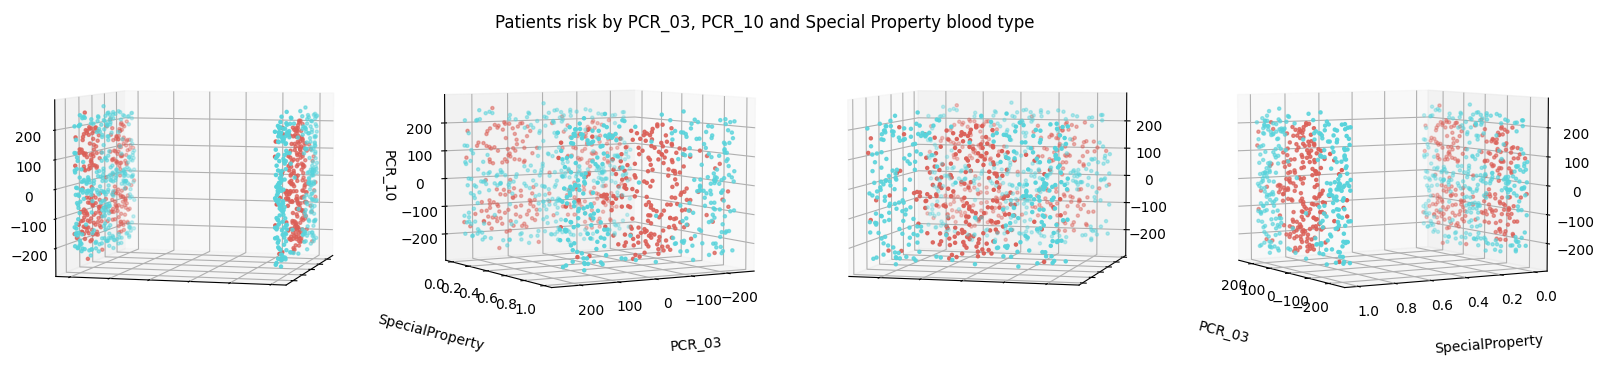

In [ ]:
plot3d(train_set, "PCR_03", "SpecialProperty", "PCR_10", title="Patients risk by PCR_03, PCR_10 and Special Property blood type", hue="risk", s=5)

## Part 5 - More Data Normalization

<Axes: xlabel='PCR_08', ylabel='Count'>

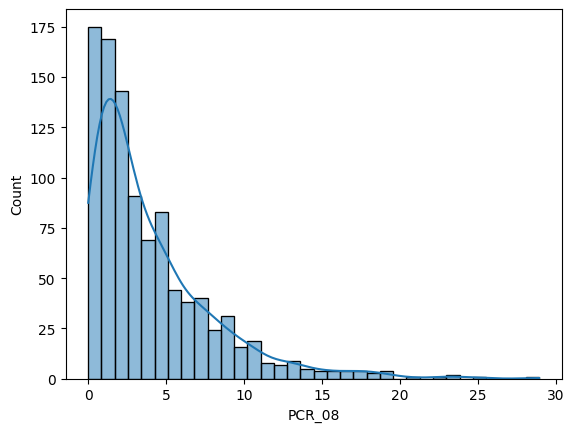

In [ ]:
# Task F
# checking the disstribution of each PCR feature to determine normalization method
sns.histplot(train_set.PCR_08, kde=True)

# looks like: normal distribution or chi squares = {1,2,4,5,6,7,8,9}, uniform = {3,10}

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# for normally distributed features, we will use standard normalization, otherwise we will use MinMax
std_scaler = StandardScaler()
minmax_scaler = MinMaxScaler((-1, 1)) #maybe [0,1]?

normalized_train_set = train_set.copy()
std_pcr_cols = ['PCR_01', 'PCR_02','PCR_04', 'PCR_05', 'PCR_06', 'PCR_07', 'PCR_08', 'PCR_09'] # normally/chi_squared distributed
minmax_pcr_cols = ['PCR_03', 'PCR_10'] # not normally distributed

normalized_train_set[std_pcr_cols] = std_scaler.fit_transform(train_set[std_pcr_cols])
normalized_train_set[minmax_pcr_cols] = minmax_scaler.fit_transform(train_set[minmax_pcr_cols])

normalized_train_set.head()

patient_id  age sex  weight            current_location  \
1116        1192   33   F    79.2    ('57.30185', '39.85331')   
431          298   40   F    66.2     ('51.19139', '6.51352')   
787           42   13   M    30.1    ('60.02427', '30.28491')   
687         1237   10   F    34.9  ('-21.41222', '-42.19667')   
1170         320   11   M    34.0   ('16.75973', '-93.11308')   

      num_of_siblings  happiness_score  household_income  \
1116                0                7               0.1   
431                 3               10               1.4   
787                 2               11               1.1   
687                 2                8               1.2   
1170                3               10               0.1   

      conversations_per_day  sugar_levels  ...    PCR_04    PCR_05    PCR_06  \
1116                      3           112  ... -0.854489  1.651685 -0.259948   
431                       3           104  ...  1.822390  0.897466 -1.032219   
787                       4            51  ... -0.110836 -0.634716 -0.825147   
687                       9            52  ... -0.025483 -0.481008 -0.260672   
1170                      3            55  ...  1.442207  0.410215  0.035451   

        PCR_07    PCR_08    PCR_09    PCR_10  spread  risk  SpecialProperty  
1116  1.587620  0.154653  0.699371  0.750890    -1.0     1            False  
431  -0.614646 -0.757062 -0.145924 -0.468320     1.0     1            False  
787   1.147335 -0.915574  0.965901  0.809377    -1.0    -1             True  
687   0.582176  2.261562  0.984764  0.013915    -1.0    -1            False  
1170  1.047244 -0.609780 -0.050378 -0.609713     1.0    -1            False  

[5 rows x 25 columns]

## Part 6: Data Preparation Pipeline

In [ ]:
#Task H
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [ ]:
def categoriesUpdate(data):
  copy_of_data_set = data.copy()

  #drop of all irellevent columns
  copy_of_data_set.drop('patient_id', inplace=True, axis=1)

  #creating spacial porperty category
  copy_of_data_set['SpecialProperty'] = copy_of_data_set['blood_type'].isin(["O+", "B+"])
  copy_of_data_set.drop('blood_type', inplace=True, axis=1)

  #transform gender to boolean
  sex_dict={'M': 0, 'F': 1}
  copy_of_data_set.sex = [sex_dict[i] for i in copy_of_data_set.sex]

  return copy_of_data_set

In [ ]:
def normalizationByStandartMethod(train, data):
  standard_cols = ['PCR_01', 'PCR_02','PCR_04', 'PCR_05', 'PCR_06', 'PCR_07', 'PCR_08', 'PCR_09']
  scaler = StandardScaler()
  scaler.fit(train[standard_cols]) # 1. maybe needs .fit_transform() 2. train_data shouldnt be changed [also this is not returned so doesnt rly mtr]
  data[standard_cols]=scaler.transform(data[standard_cols]) # Function should output the new "data", should be changed according to mentioned above

In [ ]:
def normalizationByMinMaxtMethod(train, data):
  min_max_cols = ['PCR_03', 'PCR_10']
  scaler = MinMaxScaler((-1,1))
  scaler.fit(train[min_max_cols])
  data[min_max_cols]=scaler.transform(data[min_max_cols])

In [ ]:
def prepare_data(training_data, new_data):
  new_train_set = categoriesUpdate(training_data)
  new_data_copied = categoriesUpdate(new_data)

  normalizationByStandartMethod(new_train_set, new_data_copied)
  normalizationByMinMaxtMethod(new_train_set, new_data_copied)

  return new_data_copied

In [ ]:
# in previous parts we manually updated the train_set and test_set, so here we call the function with the unchanged ones
# Prepare training set according to itself
train_df_prepared = prepare_data(unchanged_train_set, unchanged_train_set)
# Prepare test set according to the raw training set
test_df_prepared = prepare_data(unchanged_train_set, unchanged_test_set)

train_df_prepared.to_csv('train_df_prepared.csv', index=False)
test_df_prepared.to_csv('test_df_prepared.csv', index=False)

# How to download from Colab?

In [ ]:
from google.colab import files
# outputPath = 'train_df_prepared.csv'
# dataset.to_csv(outputPath)
files.download('train_df_prepared.csv')
files.download('test_df_prepared.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>